# Campus Placement Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Dataset/main.csv")

In [3]:
df.head()

sl_no  gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1       0  67.00   Others  91.00   Others  Commerce     58.00   
1      2       0  79.33  Central  78.33   Others   Science     77.48   
2      3       0  65.00  Central  68.00  Central      Arts     64.00   
3      4       0  56.00  Central  52.00  Central   Science     52.00   
4      5       0  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p      status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80      Placed  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28      Placed  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80      Placed  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43  Not Placed       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50      Placed  425000.0

In [4]:
df.shape

(215, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    int64  
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(2), object(7)
memory usage: 25.3+ KB


In [6]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [7]:
df.drop(['salary','sl_no','ssc_b','hsc_b'], axis=1, inplace=True)

In [8]:
df.isnull().sum()

gender            0
ssc_p             0
hsc_p             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
dtype: int64

## Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df["degree_t"] = df["degree_t"].astype('category')

In [11]:
df["workex"] = df["workex"].astype('category')

In [12]:
df["specialisation"] = df["specialisation"].astype('category')

In [13]:
df["status"] = df["status"].astype('category')

In [14]:
df["gender"] = df["gender"].astype('category')

In [15]:
df["hsc_s"] = df["hsc_s"].astype('category')

In [16]:
df["workex"] = df["workex"].cat.codes

In [17]:
df["gender"] = df["gender"].cat.codes

In [18]:
df["degree_t"] = df["degree_t"].cat.codes

In [19]:
df["specialisation"] = df["specialisation"].cat.codes

In [20]:
df["status"] = df["status"].cat.codes

In [21]:
df["hsc_s"] = df["hsc_s"].cat.codes

In [22]:
df.dtypes

gender               int8
ssc_p             float64
hsc_p             float64
hsc_s                int8
degree_p          float64
degree_t             int8
workex               int8
etest_p           float64
specialisation       int8
mba_p             float64
status               int8
dtype: object

In [23]:
df.head()

gender  ssc_p  hsc_p  hsc_s  degree_p  degree_t  workex  etest_p  \
0       0  67.00  91.00      1     58.00         2       0     55.0   
1       0  79.33  78.33      2     77.48         2       1     86.5   
2       0  65.00  68.00      0     64.00         0       0     75.0   
3       0  56.00  52.00      2     52.00         2       0     66.0   
4       0  85.80  73.60      1     73.30         0       0     96.8   

   specialisation  mba_p  status  
0               1  58.80       1  
1               0  66.28       1  
2               0  57.80       1  
3               1  59.43       0  
4               0  55.50       1

In [24]:
df.describe()

gender       ssc_p       hsc_p       hsc_s    degree_p    degree_t  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean     0.353488   67.303395   66.333163    1.372093   66.370186    0.600000   
std      0.479168   10.827205   10.897509    0.580978    7.358743    0.890238   
min      0.000000   40.890000   37.000000    0.000000   50.000000    0.000000   
25%      0.000000   60.600000   60.900000    1.000000   61.000000    0.000000   
50%      0.000000   67.000000   65.000000    1.000000   66.000000    0.000000   
75%      1.000000   75.700000   73.000000    2.000000   72.000000    2.000000   
max      1.000000   89.400000   97.700000    2.000000   91.000000    2.000000   

           workex     etest_p  specialisation       mba_p      status  
count  215.000000  215.000000      215.000000  215.000000  215.000000  
mean     0.344186   72.100558        0.441860   62.278186    0.688372  
std      0.476211   13.275956        0.497767    5.833385    0.464240  
min      0.000000   50.000000        0.000000   51.210000    0.000000  
25%      0.000000   60.000000        0.000000   57.945000    0.000000  
50%      0.000000   71.000000        0.000000   62.000000    1.000000  
75%      1.000000   83.500000        1.000000   66.255000    1.000000  
max      1.000000   98.000000        1.000000   77.890000    1.000000

## Checking for Outliers

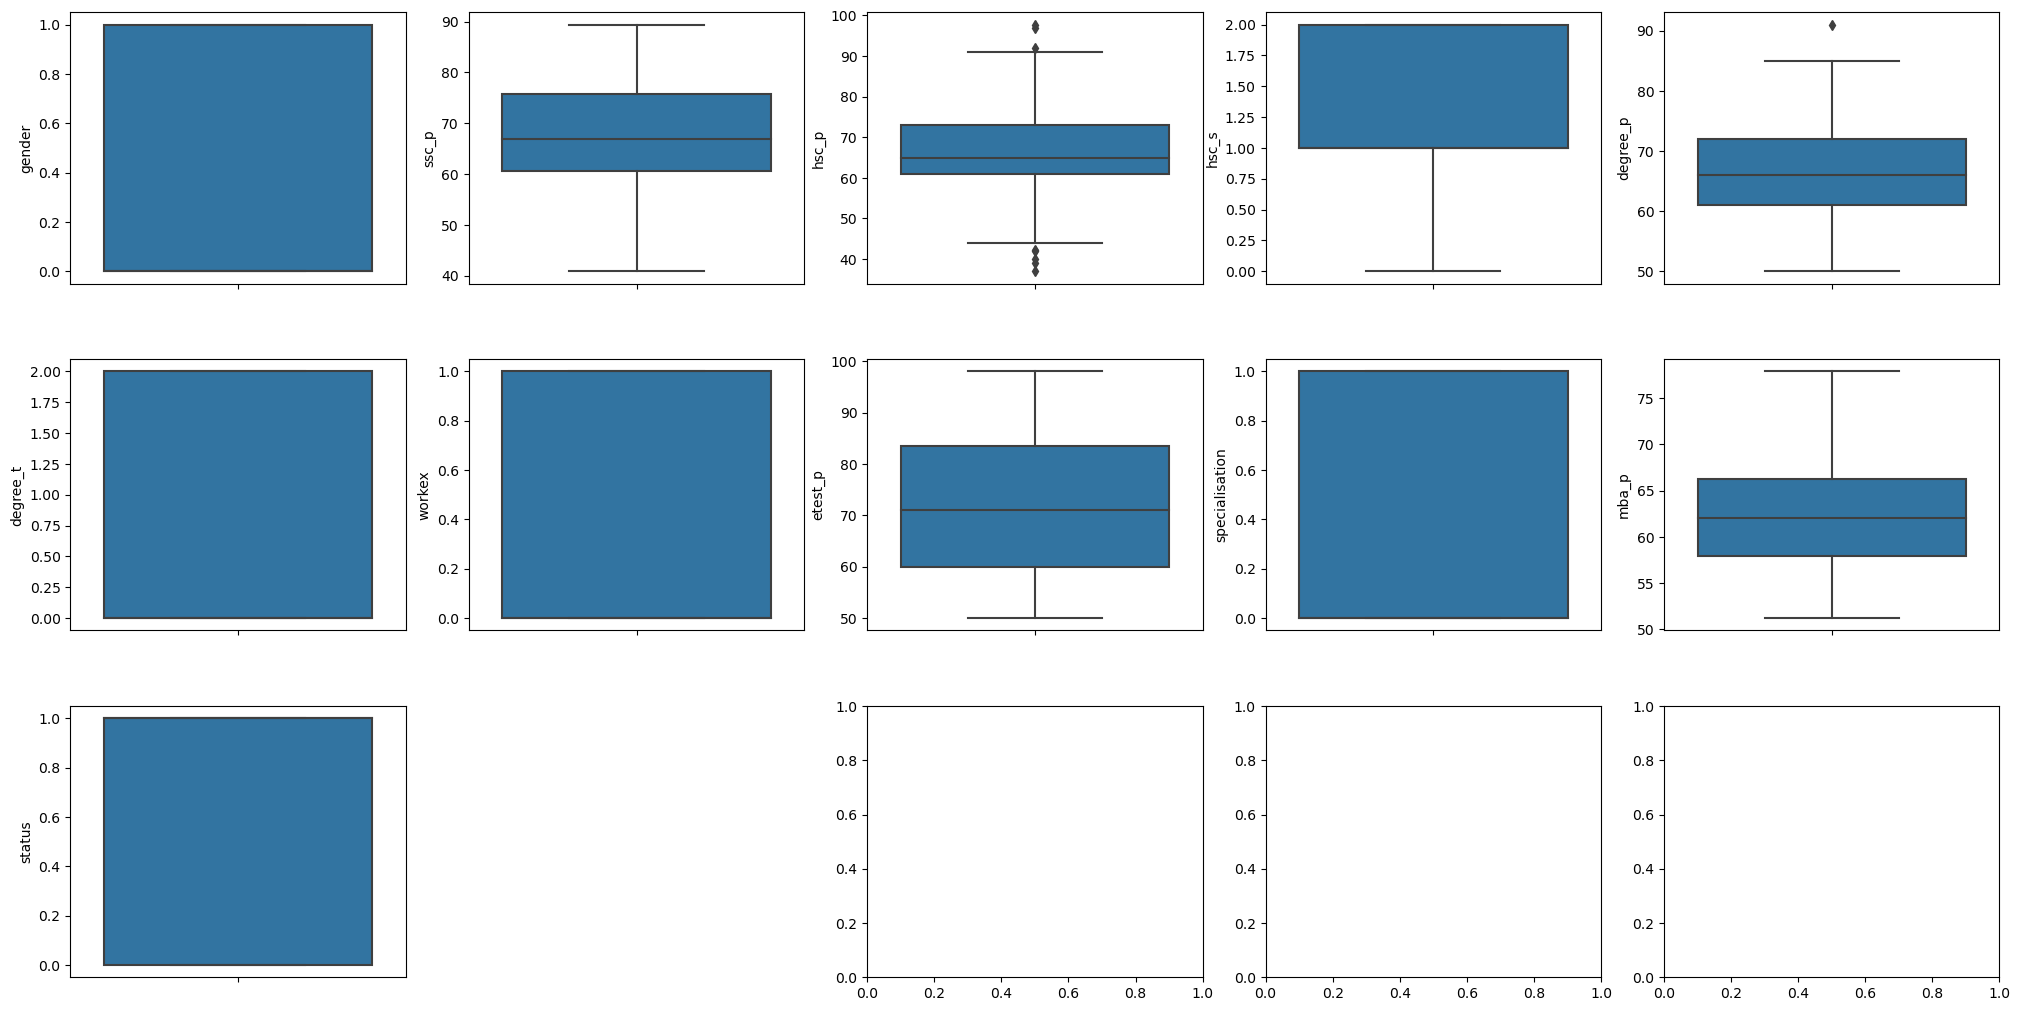

In [25]:
import seaborn as sns
fig, axs = plt.subplots(ncols=5,nrows=3,figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=v, ax=axs[index])
    index+=1

fig.delaxes(axs[index])
plt.tight_layout(pad=0.3, w_pad=0.5,h_pad = 4.5) 

In [26]:
# deleting some outliers in 2 columns degree_p and hsc_p
df = df[~(df['degree_p']>=90)]
df = df[~(df['hsc_p']>=95)]

## Correlation

In [27]:
cor = df.corr()
cor

gender     ssc_p     hsc_p     hsc_s  degree_p  degree_t  \
gender          1.000000  0.059818  0.022187 -0.072116  0.154679 -0.063117   
ssc_p           0.059818  1.000000  0.528111  0.229080  0.528753  0.193851   
hsc_p           0.022187  0.528111  1.000000 -0.172575  0.443595 -0.095199   
hsc_s          -0.072116  0.229080 -0.172575  1.000000  0.122510  0.589604   
degree_p        0.154679  0.528753  0.443595  0.122510  1.000000  0.049952   
degree_t       -0.063117  0.193851 -0.095199  0.589604  0.049952  1.000000   
workex         -0.093325  0.183073  0.135144  0.019540  0.135100  0.123191   
etest_p        -0.081765  0.264009  0.208809  0.076214  0.226353  0.008704   
specialisation  0.103355 -0.177436 -0.222405  0.170520 -0.232618  0.081459   
mba_p           0.298466  0.377438  0.335610  0.027663  0.376261  0.099991   
status         -0.098189  0.605381  0.499777  0.028882  0.479557 -0.028670   

                  workex   etest_p  specialisation     mba_p    status  
gender         -0.093325 -0.081765        0.103355  0.298466 -0.098189  
ssc_p           0.183073  0.264009       -0.177436  0.377438  0.605381  
hsc_p           0.135144  0.208809       -0.222405  0.335610  0.499777  
hsc_s           0.019540  0.076214        0.170520  0.027663  0.028882  
degree_p        0.135100  0.226353       -0.232618  0.376261  0.479557  
degree_t        0.123191  0.008704        0.081459  0.099991 -0.028670  
workex          1.000000  0.052862       -0.187200  0.174951  0.279091  
etest_p         0.052862  1.000000       -0.222765  0.203663  0.122770  
specialisation -0.187200 -0.222765        1.000000 -0.100456 -0.251043  
mba_p           0.174951  0.203663       -0.100456  1.000000  0.063197  
status          0.279091  0.122770       -0.251043  0.063197  1.000000

In [28]:
import seaborn as sns
from matplotlib.pyplot import figure

<Axes: >

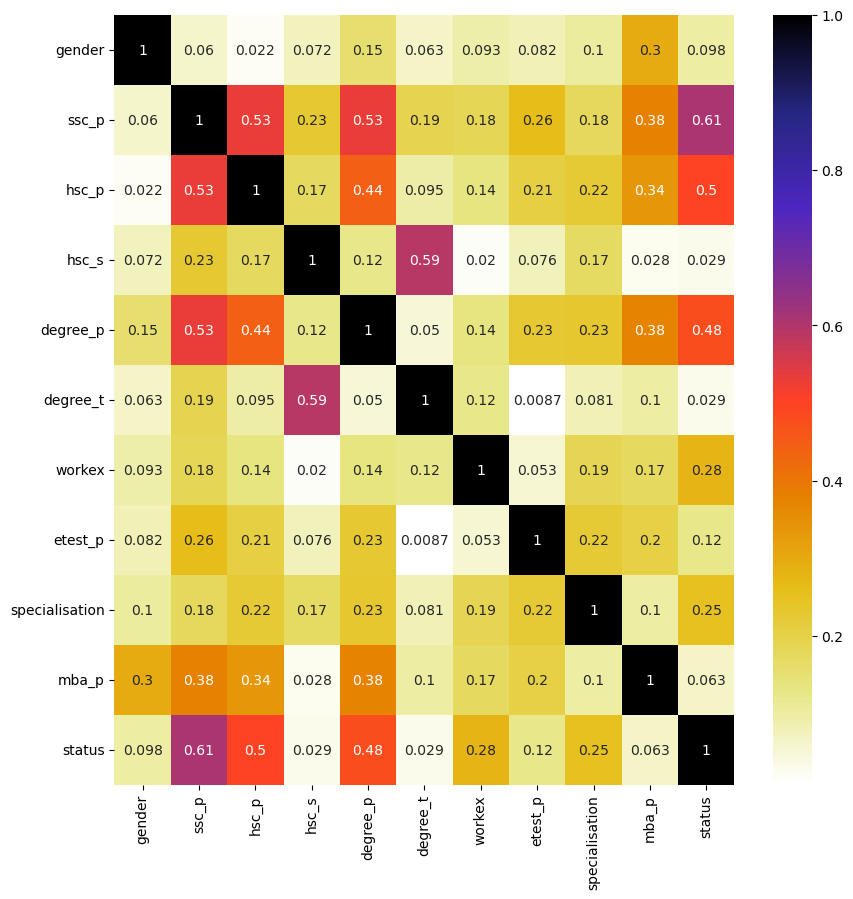

In [29]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(cor.abs(), annot=True, cmap=plt.cm.CMRmap_r)

In [30]:
df.shape

(212, 11)

In [31]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

## Model Tranning

In [32]:
df.columns

Index(['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'degree_p', 'degree_t', 'workex',
       'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [33]:
df_class = df.copy()
x = df_class.iloc[:,0:-1].values
y = df_class.iloc[:,-1].values

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.18,random_state=0)

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
import pickle
pickle.dump(sc,open('scaling.pkl','wb'))

### Logistic Regression 

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
y1 = lr.predict(x_test)

In [40]:
y1

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int8)

In [41]:
s1 = accuracy_score(y_test,y1)

In [42]:
s1

0.8974358974358975

In [43]:
confusion_matrix(y_test,y1)

array([[15,  2],
       [ 2, 20]], dtype=int64)

In [44]:
print(classification_report(y_test,y1))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.91      0.91      0.91        22

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



### KNN Classifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y2 = knn.predict(x_test)

In [46]:
y2

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0], dtype=int8)

In [47]:
s2 = accuracy_score(y_test,y2)
s2

0.7435897435897436

In [48]:
confusion_matrix(y_test,y2)

array([[10,  7],
       [ 3, 19]], dtype=int64)

In [49]:
print(classification_report(y_test,y2))

              precision    recall  f1-score   support

           0       0.77      0.59      0.67        17
           1       0.73      0.86      0.79        22

    accuracy                           0.74        39
   macro avg       0.75      0.73      0.73        39
weighted avg       0.75      0.74      0.74        39



### SVM Classifier

In [50]:
# SVM
from sklearn import svm
svm = svm.SVC(kernel="linear")
svm.fit(x_train,y_train)
y3 = svm.predict(x_test)

In [51]:
y3

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int8)

In [52]:
s3 = accuracy_score(y_test,y3)
s3

0.8974358974358975

In [53]:
confusion_matrix(y_test,y3)

array([[15,  2],
       [ 2, 20]], dtype=int64)

In [54]:
print(classification_report(y_test,y3))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        17
           1       0.91      0.91      0.91        22

    accuracy                           0.90        39
   macro avg       0.90      0.90      0.90        39
weighted avg       0.90      0.90      0.90        39



### DecisionTree Classifier

In [55]:
# DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y4 = dt.predict(x_test)

In [56]:
y4

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int8)

In [57]:
s4 = accuracy_score(y_test,y4)
s4

0.8205128205128205

In [58]:
confusion_matrix(y_test,y4)

array([[14,  3],
       [ 4, 18]], dtype=int64)

In [59]:
print(classification_report(y_test,y4))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80        17
           1       0.86      0.82      0.84        22

    accuracy                           0.82        39
   macro avg       0.82      0.82      0.82        39
weighted avg       0.82      0.82      0.82        39



### RandomForest Classifier

In [60]:
# RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y5 = rf.predict(x_test)

In [61]:
y5

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int8)

In [62]:
s5 = accuracy_score(y_test,y5)
s5

0.8205128205128205

In [63]:
confusion_matrix(y_test,y5)

array([[13,  4],
       [ 3, 19]], dtype=int64)

In [64]:
print(classification_report(y_test,y5))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.83      0.86      0.84        22

    accuracy                           0.82        39
   macro avg       0.82      0.81      0.82        39
weighted avg       0.82      0.82      0.82        39



### Gradient Boosting Classifier

In [65]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y6 = gb.predict(x_test)

In [66]:
y6

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int8)

In [67]:
s6 = accuracy_score(y_test,y6)
s6

0.8461538461538461

In [68]:
confusion_matrix(y_test,y5)

array([[13,  4],
       [ 3, 19]], dtype=int64)

In [69]:
print(classification_report(y_test,y5))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        17
           1       0.83      0.86      0.84        22

    accuracy                           0.82        39
   macro avg       0.82      0.81      0.82        39
weighted avg       0.82      0.82      0.82        39



In [70]:
final_data = pd.DataFrame({'Models':['LogisticRegression','KNN','SVM','DecisionTreeClassifier',
                                     'RandomForestClassifier','GradientBoostingClassifier'],
            'ACC':[s1*100,
                  s2*100,
                  s3*100,
                  s4*100,
                  s5*100,s6*100]})

In [71]:
final_data

Models        ACC
0          LogisticRegression  89.743590
1                         KNN  74.358974
2                         SVM  89.743590
3      DecisionTreeClassifier  82.051282
4      RandomForestClassifier  82.051282
5  GradientBoostingClassifier  84.615385

In [72]:
final_data['Models']

0            LogisticRegression
1                           KNN
2                           SVM
3        DecisionTreeClassifier
4        RandomForestClassifier
5    GradientBoostingClassifier
Name: Models, dtype: object

In [73]:
import seaborn as sns

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'LogisticRegression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'SVM'),
  Text(3, 0, 'DecisionTreeClassifier'),
  Text(4, 0, 'RandomForestClassifier'),
  Text(5, 0, 'GradientBoostingClassifier')])

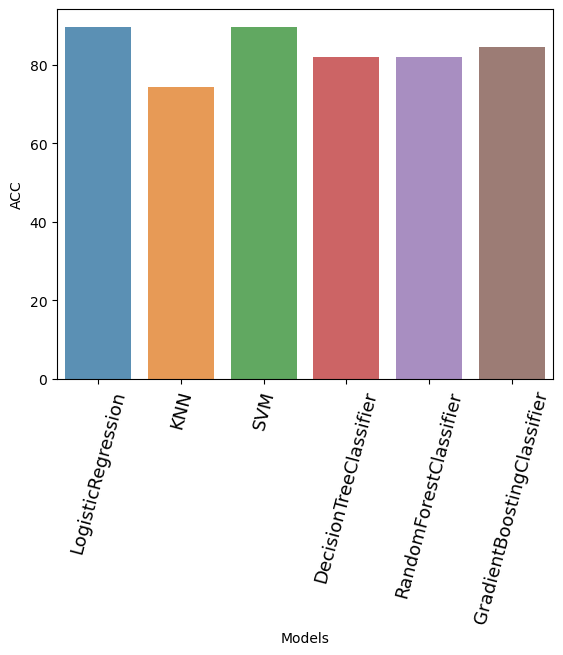

In [74]:
sns.barplot(x=final_data['Models'], y = final_data['ACC'], alpha=0.8)
plt.xticks(rotation = 75, fontsize = 13)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 214
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          212 non-null    int8   
 1   ssc_p           212 non-null    float64
 2   hsc_p           212 non-null    float64
 3   hsc_s           212 non-null    int8   
 4   degree_p        212 non-null    float64
 5   degree_t        212 non-null    int8   
 6   workex          212 non-null    int8   
 7   etest_p         212 non-null    float64
 8   specialisation  212 non-null    int8   
 9   mba_p           212 non-null    float64
 10  status          212 non-null    int8   
dtypes: float64(5), int8(6)
memory usage: 11.2 KB


##  Model Saving

In [76]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [77]:
new_data = pd.DataFrame({
    'gender':0,
    'ssc_p':67.0,
    'hsc_p':91.0,
    'hsc_s':1,
    'degree_p':58.0,
    'degree_t':2,
    'workex':0,
    'etest_p':55.0,
     'specialisation':1,
    'mba_p':58.8,   
},index=[0])

In [78]:
lr= LogisticRegression()
lr.fit(x,y,sample_weight=None)

C:\Users\papal\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [79]:
p = lr.predict(new_data)
prob=lr.predict_proba(new_data)
if p == 1:
    print('Placed')
    print(f"You will be placed with probability of {prob[0][1]:.2f}")
else:
    print("Not-placed")

Placed
You will be placed with probability of 0.82


C:\Users\papal\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
C:\Users\papal\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [81]:
import pickle

In [82]:
pickle.dump(lr, open('model.pkl','wb'))

In [83]:
model = pickle.load(open('model.pkl','rb'))

In [84]:
model.predict(new_data)

C:\Users\papal\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1], dtype=int8)

In [85]:
r = model.predict_proba(new_data)

C:\Users\papal\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [86]:
r.dtype

dtype('float64')

In [87]:
r[0][1]

0.8181479948305849